# About Dataset

<b>Acknowledgements</b>

<a href='https://www.booking.com/hotel/cy/la-veranda.en-gb.html' target='blank'>Booking.com의 La Veranda Hotel</a>에서 스크랩한 이 데이터는 이미 모든 사람이 자유롭게 사용할 수 있으며, 데이터의 원래 소유권은 <a href='https://www.booking.com/hotel/cy/la-veranda.en-gb.html' target='blank'>Booking.com</a>에 있다.

<b>Data Context</b>

해당 데이터는 Larnaca-Cyprus에 있는 호텔의 리뷰 15,000를 포함한다. 이 호텔은 데이터가 스크랩되기 정확히 1년 전에 설립됐으며, 데이터에 있는 리뷰는 처음 설립되고 1년 동안 호텔에 머물렀던 투숙객의 경험에 대한 귀중한 통찰력을 제공한다.

<b>Data Content</b>

데이터셋에 있는 칼럼:
<ol>
    <li><b>Title</b>: 작성한 리뷰의 간략한 요약</li>
    <li><b>Positive Review</b>: 호텔 숙박에 관한 긍정적인 설명</li>
    <li><b>Negative Review</b>: 호텔 숙박에 관한 부정적인 설명</li>
    <li><b>Score</b>: 평가 점수(10점 만점)</li>
    <li><b>Guest Name</b>: 리뷰를 작성한 게스트의 이름</li>
    <li><b>Guest Country</b>: 리뷰를 작성한 게스트의 출신 국가</li>
    <li><b>Room Type</b>: 방문한 방의 유형</li>
    <li><b>Number of Nights</b>: 게스트가 숙박한 일수</li>
    <li><b>Visit Date</b>: 방문 날짜</li>
    <li><b>Group Type</b>: 방문 단위(커플, 가족 등)</li>
    <li><b>Property Response</b>: 호텔이 남긴 리뷰에 대한 답글</li>
</ol>

게스트의 이름은 익명일 수 있다.

# Settings

In [2]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥ 0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import os
import numpy as np
import pandas as pd

# 노트북 실행 결과를 같게 하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "Hotel Reviews Booking"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    print('그림 저장:', fig_id)
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load Data

데이터를 <code>pd.read_csv()</code>로 로드한 후, <code>head()</code>로 첫 5행을 확인한다.

In [69]:
# Load data
data = pd.read_csv('./La_Veranda_Reviews-2023-01-16.csv')

data.head()

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN


<code>info()</code> 메서드로 데이터의 요약통계량을 확인한다.

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1521 non-null   object 
 1   PositiveReview    775 non-null    object 
 2   NegativeReview    435 non-null    object 
 3   Score             1523 non-null   float64
 4   GuestName         1523 non-null   object 
 5   GuestCountry      1523 non-null   object 
 6   RoomType          1460 non-null   object 
 7   NumberOfNights    1523 non-null   object 
 8   VisitDate         1523 non-null   object 
 9   GroupType         1523 non-null   object 
 10  PropertyResponse  123 non-null    object 
dtypes: float64(1), object(10)
memory usage: 131.0+ KB


<ol>
    <li>총 1,523개의 row와 11개의 column이 있다.</li>
    <li>데이터 타입이 실수형인 Score를 제외하곤 모두 object형이다.</li>
    <li>결측치가 존재한다.</li>
</ol>

각 칼럼의 결측치를 확인해보겠다.

In [60]:
data.isna().sum()

Title                  2
PositiveReview       748
NegativeReview      1088
Score                  0
GuestName              0
GuestCountry           0
RoomType              63
NumberOfNights         0
VisitDate              0
GroupType              0
PropertyResponse    1400
dtype: int64

PropertyResponse 칼럼은 약 91.2%가 결측치이며, NegativeReview 칼럼은 약 71.4%가 결측치다. 또한, PositiveReview 칼럼은 약 49.1%의 결측치가 존재한다.

해당 데이터의 기술통계량을 확인하겠다. <code>describe(include='all')</code>를 이용하면 데이터 타입이 object형인 데이터까지도 포함해서 제공한다.

In [61]:
data.describe(include='all')

,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
count,1521,775,435,1523.000000,1523,1523,1460,1523,1523,1523,123
unique,455,768,378,NaN,1055,68,7,15,20,4,117
top,Exceptional,friendly staff,Nothing,NaN,Anonymous,United Kingdom,Double Room with Balcony,1 night,October 2022,Couple,thank you very much for your kind review and g...
freq,403,3,30,NaN,63,239,702,1151,165,536,4
mean,NaN,NaN,NaN,8.973802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.300178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ol>
    <li>Score 칼럼을 보면 평균과 중간값이 9에 가깝다. 이에 오른쪽으로 치우친<sup>skew</sup>(왼쪽으로 꼬리가 긴) 형태인 것을 짐작할 수 있다.</li>
    <li>GuestName 칼럼에서는 익명 제공자가 63명으로 가장 많으며, 나머지는 실명을 남겼을 것으로 추측된다.</li>
    <li>GuestCountry 칼럼에서는 239명의 투숙객의 출신 국가가 United Kingdom이다.</li>
    <li>RoomType 칼럼을 보면 투숙객 중 절반이 Double Roomm with Balcony 를 이용한 것을 알 수 있다.</li>
    <li>NumberOfNights 칼럼을 보면 약 75.6%의 사람이 하루 숙박을 하였다는 것을 알 수 있다.</li>
    <li>8월에 가장 많이 방문을 했다.</li>
    <li>투숙객 중 약 35.2%가 커플이다.</li>
</ol>

위 1번에서 짐작한 내용을 확인해보자.

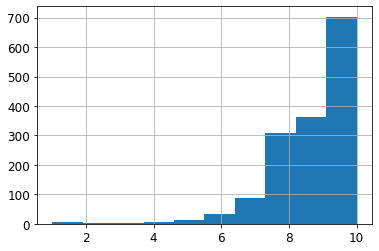

In [62]:
data['Score'].hist();

역시 짐작한 대로 왼쪽으로 꼬리가 긴 형태를 보인다.

투숙객의 출신 국가를 살펴보면 영국이 239개, 호텔이 있는 국가인 Cyprus가 183개 등 다양하게 존재한다.

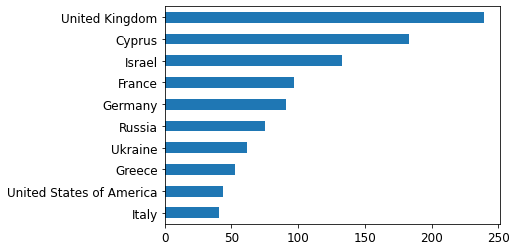

In [63]:
data['GuestCountry'].value_counts().head(10)[::-1].plot(kind='barh');

RoomType은 'Double Room with Balcony', 'Double Room', 'Two-Bedroom Suite', 'Standard Triple Room', 'Budget Twin Room', 'Family Suite with Balcony', 'Suite with Balcony' 이렇게 총 7개로 구성된다.

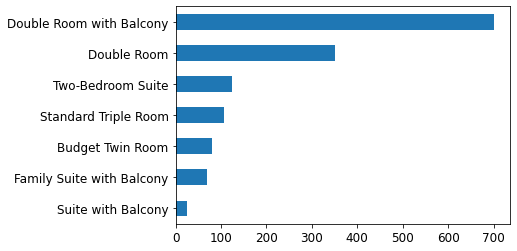

In [64]:
data['RoomType'].value_counts()[::-1].plot(kind='barh');

다음 NumberOfNights 칼럼을 보면 숙박한 일수를 나타냈다.

In [65]:
data['NumberOfNights'].value_counts()

1 night      1151
2 nights      142
3 nights       92
4 nights       57
7 nights       35
5 nights       15
9 nights       10
6 nights        5
14 nights       4
11 nights       3
8 nights        3
12 nights       2
10 nights       2
16 nights       1
15 nights       1
Name: NumberOfNights, dtype: int64

이 칼럼의 데이터는 뒤 'nights' 문자를 빼고 정수형 데이터로 바꾸는 게 분석에 좀 더 유용할 것 같으므로 전처리를 해준다.

In [70]:
# 각 데이터에서 앞 2자리만 추출하여 int로 타입변환(최대 자릿수가 십의 자리이므로)
data['NumberOfNights'] = data['NumberOfNights'].str[:2].astype(int)

data['NumberOfNights'].value_counts()

1     1151
2      142
3       92
4       57
7       35
5       15
9       10
6        5
14       4
11       3
8        3
12       2
10       2
16       1
15       1
Name: NumberOfNights, dtype: int64

변환한 칼럼을 그래프로 나타내보면 1값이 극심하게 많은 것을 확인할 수 있다.

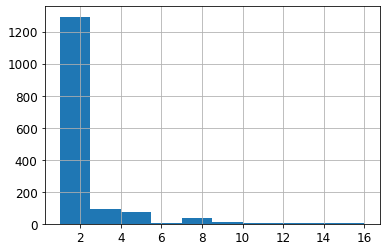

In [75]:
data['NumberOfNights'].hist();

VisitDate 칼럼의 데이터는 다음과 같이 월에 해당하는 영문자와 2021 또는 2022가 합쳐진 문자열이다.

In [89]:
data['VisitDate']

0            June 2022
1        December 2022
2        December 2022
3       September 2022
4         October 2022
             ...      
1518    September 2021
1519    September 2021
1520       August 2021
1521    September 2021
1522      October 2022
Name: VisitDate, Length: 1523, dtype: object

2021년 데이터는 494개, 2022년 데이터는 1029개가 있다.

In [92]:
pd.to_datetime(data['VisitDate']).dt.year.value_counts()

2022    1029
2021     494
Name: VisitDate, dtype: int64

해당 데이터는 연도와 월을 따로 분리해 저장하는 것이 좋을 것 같으므로 전처리를 진행해준다.

In [95]:
# VisitDate 칼럼에서 연도와 월을 분리하여 새 칼럼에 추가
data['VisitYear'] = pd.to_datetime(data['VisitDate']).dt.year
data['VisitMonth'] = pd.to_datetime(data['VisitDate']).dt.month

# VisitDate 칼럼 삭제
data.drop(['VisitDate'], axis=1, inplace=True)

다시 data의 요약통계량을 확인해보면 성공적으로 VisitDate 칼럼이 삭제되고 VisitYear와 VisitMonth 칼럼이 삭제된 것을 확인할 수 있다.

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1521 non-null   object 
 1   PositiveReview    775 non-null    object 
 2   NegativeReview    435 non-null    object 
 3   Score             1523 non-null   float64
 4   GuestName         1523 non-null   object 
 5   GuestCountry      1523 non-null   object 
 6   RoomType          1460 non-null   object 
 7   NumberOfNights    1523 non-null   int32  
 8   GroupType         1523 non-null   object 
 9   PropertyResponse  123 non-null    object 
 10  VisitYear         1523 non-null   int64  
 11  VisitMonth        1523 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 137.0+ KB


VisitDate 칼럼 전처리 후 VisitMonth로 가장 많이 방문한 달을 확인해보면, 여름과 가을에 투숙객이 많았으며 겨울에는 적었다는 점을 알 수 있다.

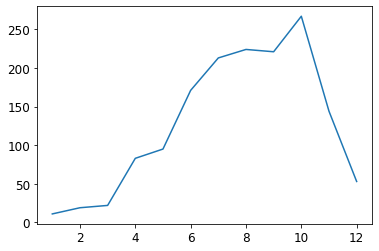

In [110]:
data['VisitMonth'].value_counts().sort_index().plot();

GroupType 칼럼의 그래프는 다음과 같으며, Couple 단위가 가장 많았다.

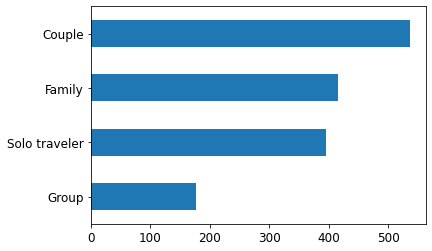

In [114]:
data['GroupType'].value_counts()[::-1].plot(kind='barh');

# 심화 분석

Score 별로 갯수를 count하면 위 그래프에서 보았듯이, 대부분 8 ~ 10점에 몰려있다.

In [141]:
data.groupby('Score').count()

,Title,PositiveReview,NegativeReview,GuestName,GuestCountry,RoomType,NumberOfNights,GroupType,PropertyResponse,VisitYear,VisitMonth
Score,,,,,,,,,,,
1.0,5,2,2,5,5,4,5,5,2,5,5
2.0,2,0,0,2,2,2,2,2,0,2,2
3.0,4,4,4,4,4,4,4,4,0,4,4
4.0,6,3,3,6,6,5,6,6,1,6,6
5.0,13,5,6,13,13,13,13,13,3,13,13
6.0,32,16,16,32,32,29,32,32,4,32,32
7.0,89,39,36,89,89,89,89,89,6,89,89
7.9,1,1,1,1,1,1,1,1,0,1,1
8.0,307,141,103,307,307,293,307,307,25,307,307


다음 함수는 최저점과 최고점의 범위를 지정하여 그에 해당하는 리뷰의 단어의 빈도수를 추출해주는 함수다. 만약 p가 True인 경우 'PositiveReview'를, False인 경우 'NegativeReview'를 추출하며, top개만큼의 최저, 최고 빈도를 보이는 특성 단어를 보여준다.

In [321]:
def get_count_vect(min_score, max_score, p=True, top=20):
    if max_score <= 2:
        ngram_range_min, ngram_range_max = 3, 4
    else:
        ngram_range_min, ngram_range_max = 4, 5
    # CountVectorizer 객체 생성(stop_words='english'로 불용어 제거)
    cnt_vect = CountVectorizer(stop_words='english', ngram_range=(ngram_range_min, ngram_range_max))
    # 입력받은 min_score <= score <= max_score에 해당하는 리뷰 추출
    mask = (data['Score'] >= min_score) & (data['Score'] <= max_score)
    # 훈련 데이터셋을 변환
    mm_data = data.loc[mask, :]
    # p=True이면 PositiveReview 추출, False이면 NegativeReview 추출
    if p:
        text = cnt_vect.fit_transform(mm_data['PositiveReview'].dropna())
    else:
        text = cnt_vect.fit_transform(mm_data['NegativeReview'].dropna())
    # 특성별로 가장 큰 값을 찾음
    max_value = text.max(axis=0).toarray().ravel()
    sorted_by_cnt = max_value.argsort()
    # 특성 이름을 구함
    feature_names = np.array(cnt_vect.get_feature_names_out())
    
    # 출력
    print("가장 낮은 count를 가진 특성:\n", feature_names[sorted_by_cnt[:20]])
    print("가장 높은 count를 가진 특성:\n", feature_names[sorted_by_cnt[-20:]])

In [329]:
get_count_vect(10, 10)

가장 낮은 count를 가진 특성:
 ['10 10 desk absolutely' 'order close larnaca airport early'
 'order close larnaca airport' 'options couple days arrival changed'
 'options couple days arrival' 'options 10 eur friendly host'
 'options 10 eur friendly' 'option paying 15 euros taxi'
 'option paying 15 euros' 'option good breakfast hotel save'
 'option good breakfast hotel' 'option arrive larnaca airport close'
 'option arrive larnaca airport' 'order taxis help car'
 'opinion available pleasant professional staff'
 'opennes room extremely clean room' 'opennes room extremely clean'
 'onsite small restaurant delish service' 'onsite small restaurant delish'
 'ones comfortable beds furthermore restaurant']
가장 높은 count를 가진 특성:
 ['extremely clean newly renovated' 'extremely clean good location near'
 'extremely clean good location' 'extraordinary close airport min walk'
 'extraordinary close airport min' 'extra mile satisfaction hotel great'
 'extra mile satisfaction hotel' 'extra good hotel 100m 425'
 'ex